<a href="https://colab.research.google.com/github/Sathish120804/ATM-PROGRAM/blob/main/simple_open_cv_project_for_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Saved: camera_image.jpg


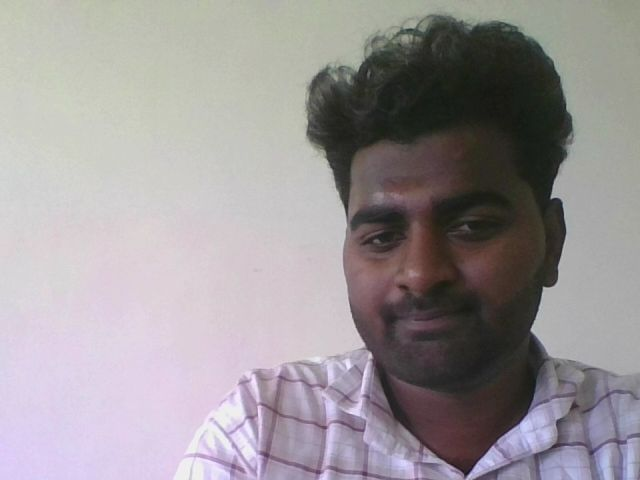

In [2]:
from google.colab import output
from base64 import b64decode

def take_photo(filename='camera_image.jpg', quality=0.8):
    js = """
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => (button.onclick = resolve));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach((t) => t.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto(%f);
    """ % quality

    data = output.eval_js(js)
    data = data.split(',')[1]
    binary = b64decode(data)

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Take a photo
photo_path = take_photo('camera_image.jpg')
print("✅ Saved:", photo_path)

import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(photo_path)
cv2_imshow(img)


✅ Downloaded: haarcascade_frontalface_default.xml
✅ Faces detected: 1


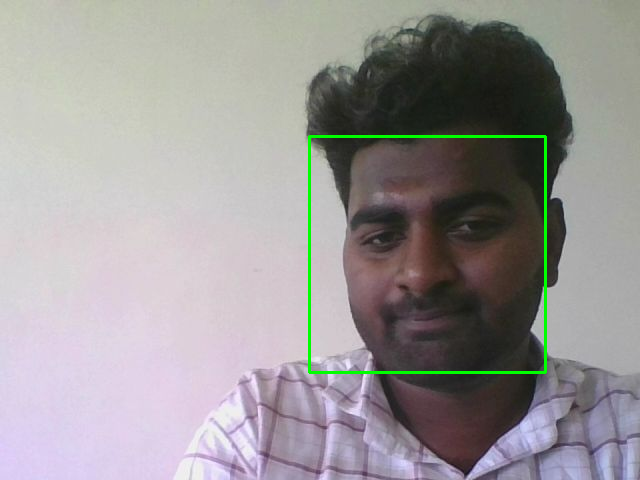

In [3]:
import cv2
import os
from google.colab.patches import cv2_imshow
import urllib.request

IMG_PATH = 'camera_image.jpg'

# Check if image exists
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError("❌ Image not found! Please run the camera cell again.")

img = cv2.imread(IMG_PATH)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Download Haar Cascade if missing
cascade_path = "haarcascade_frontalface_default.xml"
if not os.path.exists(cascade_path):
    print("Downloading Haar Cascade…")
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    urllib.request.urlretrieve(url, cascade_path)
    print("✅ Downloaded:", cascade_path)

face_detector = cv2.CascadeClassifier(cascade_path)

# Detect faces
faces = face_detector.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print("✅ Faces detected:", len(faces))

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

cv2_imshow(img)
